# Papers Past Genre Classification
# Notebook 4: Data Exploration
---

This notebook explores the structure of the loaded dataset (the output of Notebook 3: Linguistic Feature Extraction) through summary statistics and data visualisation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import spacy
import math
from datetime import date
from datetime import datetime

sns.set(rc = {'figure.figsize':(15,8)})

In [2]:
# Load the labelled dataframe
filepath = '20220113_PP_3518articles_withfeatures.pkl'
features_df = pd.read_pickle(filepath)

In [3]:
# View the count of articles by genre
display(features_df.groupby(['genre'])['genre'].count())

genre
Advertisement       66
FamilyNotice       103
Feature            172
Fiction             71
LetterToEditor     168
News               576
Notice             571
Obituary            32
Opinion            489
Poetry              34
Report            1001
Results            145
Review              65
Speech              25
Name: genre, dtype: int64

In [4]:
# Check the data types that make up the dataframe. 
features_df['genre'] = (features_df['genre']).astype('string')
features_df['text'] = (features_df['text']).astype('string')
features_df['clean_text'] = (features_df['clean_text']).astype('string')
pd.set_option('display.max_rows', None)
display(features_df.dtypes)

date                datetime64[ns]
newspaper_id                string
newspaper                   string
article_id                   int32
avg_line_width             float64
min_line_width             float64
max_line_width             float64
line_width_range           float64
avg_line_offset            float64
max_line_offset            float64
min_line_offset            float64
title                       string
text                        string
genre                       string
sentence_count               int64
clean_text                  string
word_count                   int64
syll_count                   int64
polysyll_count               int64
monosyll_count               int64
stopwords_count              int64
avg_word_length            float64
char_count                   int64
propn_count                  int64
verb_count                   int64
noun_count                   int64
adj_count                    int64
nums_count                   int64
pron_count          

In [5]:
# Print the index of each column for reference when creating plots

for col_name in features_df.columns:
    index_no = features_df.columns.get_loc(col_name)
    print(f"{index_no}: {col_name}")

0: date
1: newspaper_id
2: newspaper
3: article_id
4: avg_line_width
5: min_line_width
6: max_line_width
7: line_width_range
8: avg_line_offset
9: max_line_offset
10: min_line_offset
11: title
12: text
13: genre
14: sentence_count
15: clean_text
16: word_count
17: syll_count
18: polysyll_count
19: monosyll_count
20: stopwords_count
21: avg_word_length
22: char_count
23: propn_count
24: verb_count
25: noun_count
26: adj_count
27: nums_count
28: pron_count
29: nnps_count
30: vb_count
31: nn_count
32: jj_count
33: cd_count
34: prp_count
35: rb_count
36: cc_count
37: nnp_count
38: vbd_count
39: vbz_count
40: propn_freq
41: verb_freq
42: noun_freq
43: adj_freq
44: nums_freq
45: pron_freq
46: nnps_freq
47: vb_freq
48: nn_freq
49: jj_freq
50: cd_freq
51: prp_freq
52: rb_freq
53: cc_freq
54: nnp_freq
55: vbd_freq
56: vbz_freq
57: polysyll_freq
58: monosyll_freq
59: stopword_freq
60: tf_idf
61: tf_idf_sum


In [6]:
# Load the csv with dataset stats from the Papers Past website
# Get total number of issues and pages in the dataset
# Count total number of newspaper titles, and titles by region 

filepath = 'https://natlib.govt.nz/files/paperspast/NLNZ_newspaperData.csv'
papers_df = pd.read_csv(filepath)
papers_df

,packageName,title,year,region,issues,pages,downloadSize,link
0,ALG_1862.tar.gz,Albertland Gazette,1862,Auckland,2,8,"230,632",https://paperspast.natlib.govt.nz/opendata/tit...
1,ALG_1863.tar.gz,Albertland Gazette,1863,Auckland,5,20,"869,397",https://paperspast.natlib.govt.nz/opendata/tit...
2,ALG_1864.tar.gz,Albertland Gazette,1864,Auckland,4,16,"670,881",https://paperspast.natlib.govt.nz/opendata/tit...
3,AG_1879.tar.gz,Ashburton Guardian,1879,Canterbury,36,214,"29,531,453",https://paperspast.natlib.govt.nz/opendata/tit...
4,AG_1880.tar.gz,Ashburton Guardian,1880,Canterbury,188,763,"132,103,901",https://paperspast.natlib.govt.nz/opendata/tit...
5,AG_1881.tar.gz,Ashburton Guardian,1881,Canterbury,223,902,"156,534,195",https://paperspast.natlib.govt.nz/opendata/tit...
6,AG_1882.tar.gz,Ashburton Guardian,1882,Canterbury,152,612,"107,114,703",https://paperspast.natlib.govt.nz/opendata/tit...
7,AG_1883.tar.gz,Ashburton Guardian,1883,Canterbury,234,938,"172,724,121",https://paperspast.natlib.govt.nz/opendata/tit...
8,AG_1884.tar.gz,Ashburton Guardian,1884,Canterbury,144,576,"104,550,211",https://paperspast.natlib.govt.nz/opendata/tit...
9,AG_1885.tar.gz,Ashburton Guardian,1885,Canterbury,226,904,"164,823,203",https://paperspast.natlib.govt.nz/opendata/tit...


In [7]:
total_issues = papers_df['issues'].sum() 
total_pages = papers_df['pages'].sum() 
earliest_date = papers_df['year'].min()
latest_date = papers_df['year'].max()

print(f"Total number of issues in Papers Past open data: {total_issues}") 
print(f"Total number of pages in Papers Past open data: {total_pages}") 
print(f"The Papers Past open data covers the period: {earliest_date}-{latest_date}") 

Total number of issues in Papers Past open data: 306538
Total number of pages in Papers Past open data: 1471384
The Papers Past open data covers the period: 1839-1899


In [8]:
papers_by_region = (papers_df.groupby('region')['title'].nunique()
                   .reset_index(name='count')
                   .sort_values('count', ascending=False).reset_index(drop=True))

total_newspapers = papers_by_region['count'].sum()
print(f"Number of newspaper titles in Papers Past open data: {total_newspapers}") 

papers_by_region

Number of newspaper titles in Papers Past open data: 79


,region,count
0,Otago,18
1,Canterbury,10
2,Wellington,8
3,Manawatu-Wanganui,7
4,West Coast,7
5,Hawke's Bay,6
6,Waikato,6
7,Auckland,4
8,Taranaki,4
9,Nelson,3


In [9]:
# Find the word count of the longest article
wc_column = features_df["word_count"]
max_wc = wc_column.max()
max_wc

22698

In [10]:
# Display details of the article with the longest word count

pd.set_option('display.max_columns', None)
display(features_df.loc[features_df['word_count'] == 22698])

,date,newspaper_id,newspaper,article_id,avg_line_width,min_line_width,max_line_width,line_width_range,avg_line_offset,max_line_offset,min_line_offset,title,text,genre,sentence_count,clean_text,word_count,syll_count,polysyll_count,monosyll_count,stopwords_count,avg_word_length,char_count,propn_count,verb_count,noun_count,adj_count,nums_count,pron_count,nnps_count,vb_count,nn_count,jj_count,cd_count,prp_count,rb_count,cc_count,nnp_count,vbd_count,vbz_count,propn_freq,verb_freq,noun_freq,adj_freq,nums_freq,pron_freq,nnps_freq,vb_freq,nn_freq,jj_freq,cd_freq,prp_freq,rb_freq,cc_freq,nnp_freq,vbd_freq,vbz_freq,polysyll_freq,monosyll_freq,stopword_freq,tf_idf,tf_idf_sum
2467,1887-01-28,OW,Otago Witness,42,562.728714,25.0,597.0,572.0,4.41725,172.0,-1.0,TIMARU MURDER CASE.,"CRIMINAL SESSIONS. Fbiday, January 21. (Before...",Feature,1263,CRIMINAL SESSIONS Fbiday January 21 Before his...,22698,29561,1485,17681,10377,4.097094,115754,2105,3196,3808,972,454,2535,6,845,3259,910,454,2012,1253,813,2100,1976,137,0.092739,0.140805,0.167768,0.042823,0.020002,0.111684,0.000264,0.037228,0.143581,0.040092,0.020002,0.088642,0.055203,0.035818,0.092519,0.087056,0.006036,0.065424,0.778967,0.457177,"{'the': 0.36759067558293496, 'cain': 0.3681920...",1.462934


In [11]:
# Display the full article
# Note: cross-checked the word count by copying and pasting into Microsoft Word - it is correct

features_df['text'].values[2467]

'CRIMINAL SESSIONS. Fbiday, January 21. (Before his Honor Mr Justice Williams.) The sitting of the criminal sessions of the Supreme Court was resumed at 10 o\'clock. THE GHAHD JOHV. The following gentlemen comprised the grand jury -.—Messrs George M. Barr (foreman), William G. Neill, John W. Paulin, George Edmund Dermer, Maurice Joel, John Hislop, John Gillies, James Durston, France Arthur Cutten, Thomas Cullen, Henry Crust, Daniel Catchpole, Duncan Campbell, John Brown, George Blytb, Charles Frederick Black, and David Baxter. THE TIMARU MURDER CASE. his honor\'s chaege. "" His Honor delivered the followiug charge to ike grand jury : — * Mr Foreman and gentlemen of the grand jury, — I have asked you to come together again to consider a charge of murder. Ido not pro pose to discuss the "evidence at any length. I shall confine myself to pointing out the salient features of the case made against the accused by the depositions. The accused Thomas Hall is charged with the wilful murder of H

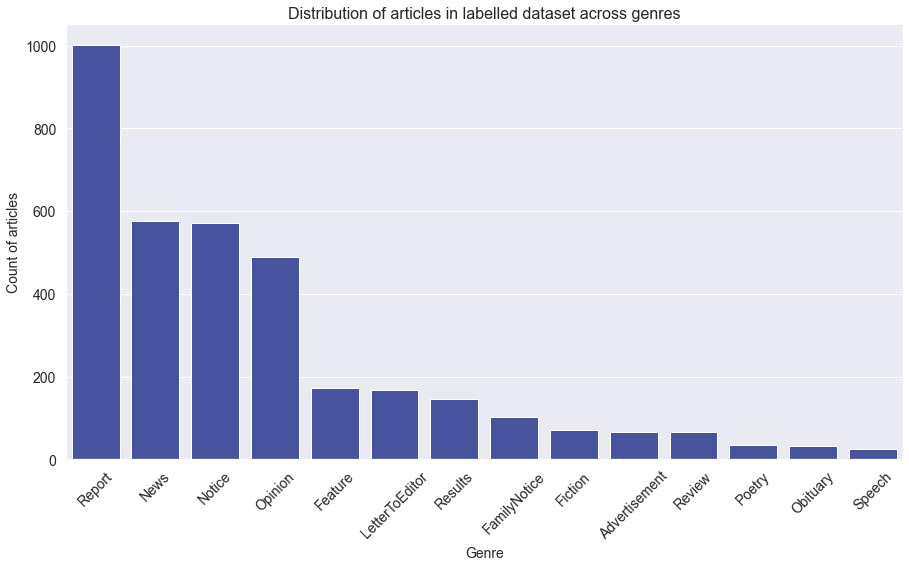

In [37]:
ax = sns.countplot(x="genre", data=features_df,
                   order=features_df['genre'].value_counts().index, 
                   color="#3949ab")
ax.set_xlabel("Genre", fontsize = 14)
ax.set_ylabel("Count of articles", fontsize = 14)
ax.set_title("Distribution of articles in labelled dataset across genres", fontsize = 16)
plt.xticks(rotation=45, fontsize = 14)
plt.yticks(fontsize = 14)
# plt.savefig('dist_art_genres.svg')
plt.show()

-----------------------------------------------------
Number of newspaper titles in sample dataset: 57
-----------------------------------------------------



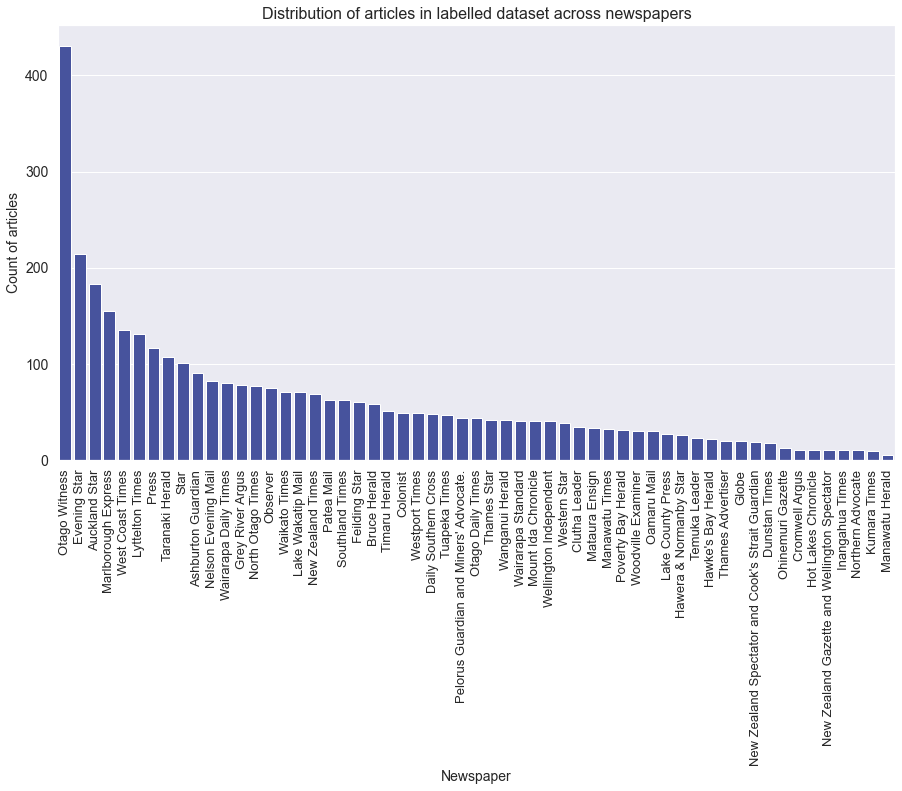

In [38]:
sample_papers_unique = features_df['newspaper'].nunique()
print("-----------------------------------------------------") 
print(f"Number of newspaper titles in sample dataset: {sample_papers_unique}") 
print("-----------------------------------------------------") 
print("") 

ax_1 = sns.countplot(x="newspaper", 
                     data=features_df, 
                     order=features_df['newspaper'].value_counts().index, 
                     color = "#3949ab")
ax_1.set_xlabel("Newspaper", fontsize = 14)
ax_1.set_ylabel("Count of articles", fontsize = 14)
ax_1.set_title("Distribution of articles in labelled dataset across newspapers", fontsize = 16)
plt.xticks(rotation = 90, fontsize = 13)
plt.yticks(fontsize = 14)
plt.show()

In [14]:
# Group by year to view distribution of the dataset 
annual_df = (features_df.groupby([features_df['date'].dt.year.rename('year')])
             ['text'].count().reset_index())

In [15]:
display(annual_df)

,year,text
0,1843,5
1,1844,5
2,1845,5
3,1850,8
4,1851,8
5,1853,6
6,1856,10
7,1857,28
8,1858,32
9,1860,4


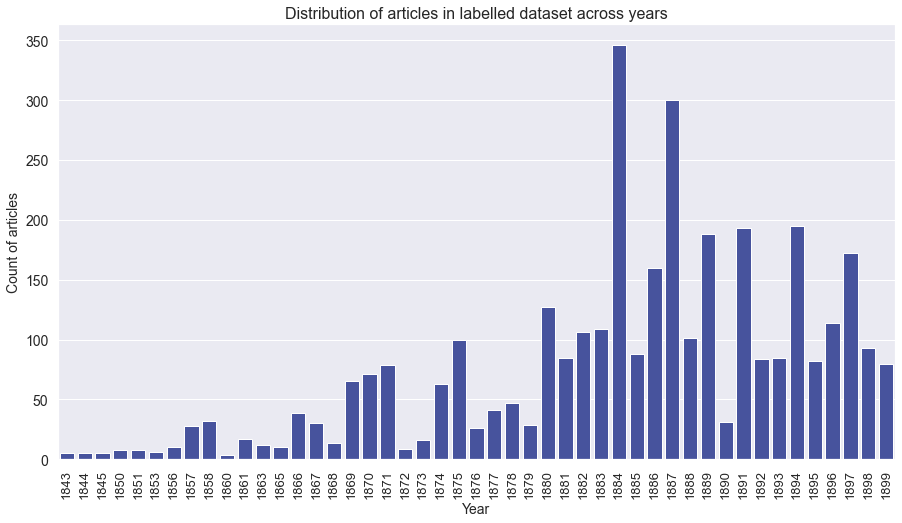

In [16]:
ax_3 = sns.barplot(x="year", y="text", data=annual_df, color = '#3949ab')
ax_3.set_xlabel("Year", fontsize = 14)
ax_3.set_ylabel("Count of articles", fontsize = 14)
ax_3.set_title("Distribution of articles in labelled dataset across years", fontsize = 16)
plt.xticks(rotation = 90, fontsize = 13)
plt.yticks(fontsize = 14)
plt.show()

In [17]:
#Splitting the df into the different genres for more detailed analysis

df_advertisement = features_df.loc[features_df['genre'] == 'Advertisement'] 
df_familynotice = features_df.loc[features_df['genre'] == 'FamilyNotice'] 
df_feature = features_df.loc[features_df['genre'] == 'Feature']
df_fiction = features_df.loc[features_df['genre'] == 'Fiction'] 
df_lettertoed = features_df.loc[features_df['genre'] == 'LetterToEditor'] 
df_news = features_df.loc[features_df['genre'] == 'News'] 
df_notice = features_df.loc[features_df['genre'] == 'Notice'] 
df_obituary = features_df.loc[features_df['genre'] == 'Obituary'] 
df_opinion = features_df.loc[features_df['genre'] == 'Opinion'] 
df_poetry = features_df.loc[features_df['genre'] == 'Poetry']
df_report = features_df.loc[features_df['genre'] == 'Report']
df_results = features_df.loc[features_df['genre'] == 'Results']
df_review = features_df.loc[features_df['genre'] == 'Review']
df_speech = features_df.loc[features_df['genre'] == 'Speech']

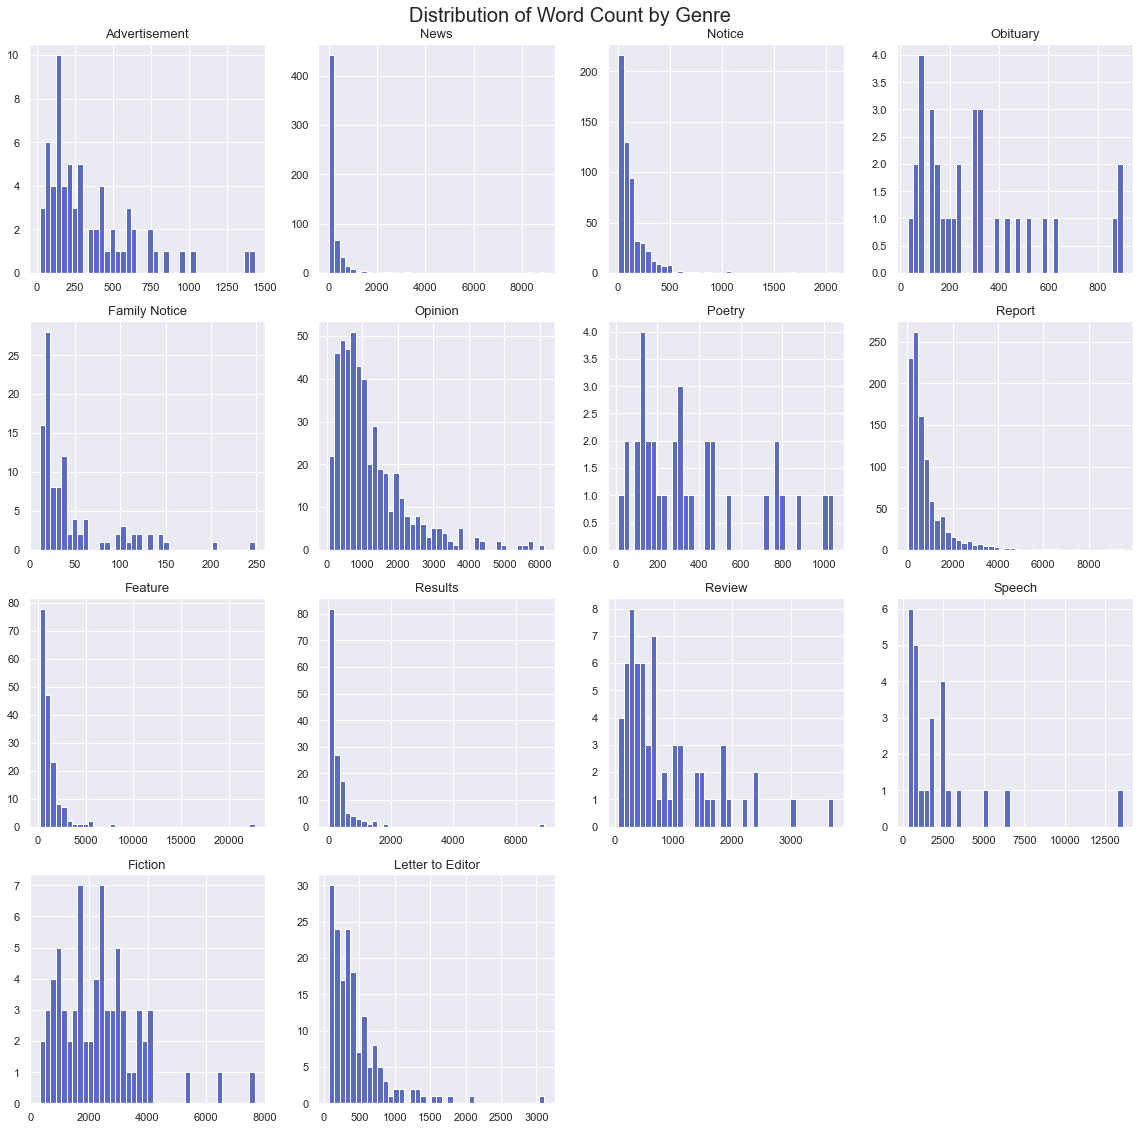

In [18]:
# Plot the distribution of word count by genre
# Code source: https://github.com/robsalgado/personal_data_science_projects/blob/master/mulitclass_text_class/Multiclass%20Text%20Classification%20Notebook.ipynb

fig, ax = plt.subplots(4, 4, figsize = (16,16))
fig.suptitle('Distribution of Word Count by Genre', fontsize=20)

bins = 40

ax[0, 0].hist(df_advertisement['word_count'], bins = bins, color = '#5c6bc0')
ax[0, 0].set_title('Advertisement', fontsize = 13)

ax[1, 0].hist(df_familynotice['word_count'], bins = bins, color = '#5c6bc0')
ax[1, 0].set_title('Family Notice', fontsize = 13)

ax[2, 0].hist(df_feature['word_count'], bins = bins, color = '#5c6bc0')
ax[2, 0].set_title('Feature', fontsize = 13)

ax[3, 0].hist(df_fiction['word_count'], bins = bins, color = '#5c6bc0')
ax[3, 0].set_title('Fiction', fontsize = 13)

ax[0, 1].hist(df_news['word_count'], bins = bins, color = '#5c6bc0')
ax[0, 1].set_title('News', fontsize = 13)

ax[0, 2].hist(df_notice['word_count'], bins = bins, color = '#5c6bc0')
ax[0, 2].set_title('Notice', fontsize = 13)

ax[0, 3].hist(df_obituary['word_count'], bins = bins, color = '#5c6bc0')
ax[0, 3].set_title('Obituary', fontsize = 13)

ax[1, 1].hist(df_opinion['word_count'], bins = bins, color = '#5c6bc0')
ax[1, 1].set_title('Opinion', fontsize = 13)

ax[1, 2].hist(df_poetry['word_count'], bins = bins, color = '#5c6bc0')
ax[1, 2].set_title('Poetry', fontsize = 13)

ax[1, 3].hist(df_report['word_count'], bins = bins, color = '#5c6bc0')
ax[1, 3].set_title('Report', fontsize = 13)

ax[2, 1].hist(df_results['word_count'], bins = bins, color = '#5c6bc0')
ax[2, 1].set_title('Results', fontsize = 13)

ax[2, 2].hist(df_review['word_count'], bins = bins, color = '#5c6bc0')
ax[2, 2].set_title('Review', fontsize = 13)

ax[2, 3].hist(df_speech['word_count'], bins = bins, color = '#5c6bc0')
ax[2, 3].set_title('Speech', fontsize = 13)

ax[3, 1].hist(df_lettertoed['word_count'], bins = bins, color = '#5c6bc0')
ax[3, 1].set_title('Letter to Editor', fontsize = 13)

plt.delaxes(ax[3][2])
plt.delaxes(ax[3][3])
plt.tight_layout()
# plt.savefig('genrebywordcount.png')
plt.show()

In [39]:
# Group by year to view distribution of the dataset 
annual_genre_df = pd.crosstab([features_df['date'].dt.year.rename('year')], 
                              features_df.genre).rename_axis(None, axis=1)

In [40]:
annual_genre_df

,Advertisement,FamilyNotice,Feature,Fiction,LetterToEditor,News,Notice,Obituary,Opinion,Poetry,Report,Results,Review,Speech
year,,,,,,,,,,,,,,
1843,0,0,0,0,0,0,3,0,0,0,2,0,0,0
1844,0,0,0,0,0,0,1,0,0,0,2,0,0,2
1845,0,0,0,0,1,0,1,0,2,0,1,0,0,0
1850,0,0,1,0,0,2,0,0,3,0,2,0,0,0
1851,0,0,0,0,0,0,1,0,4,0,3,0,0,0
1853,0,0,0,0,0,1,0,0,3,0,2,0,0,0
1856,0,0,0,0,0,1,0,0,2,0,6,0,1,0
1857,0,3,1,0,2,1,4,0,3,0,9,0,0,5
1858,0,4,2,0,4,2,4,0,5,1,8,2,0,0


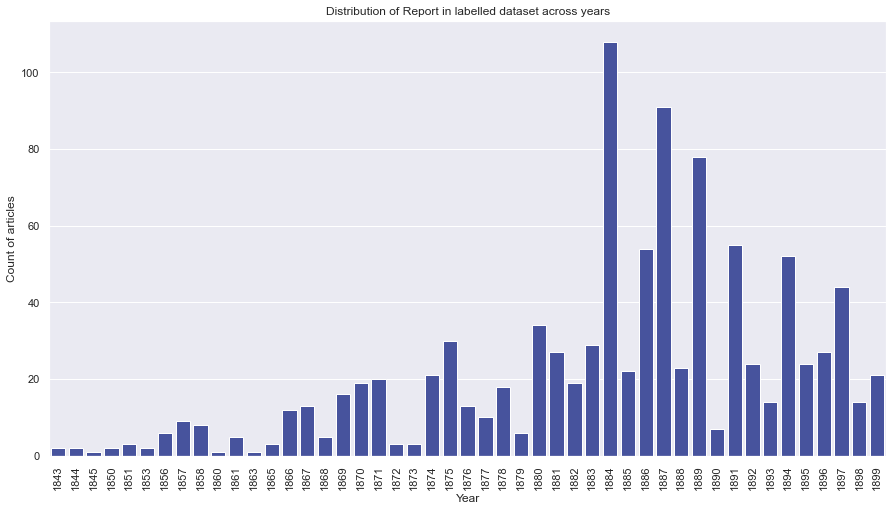

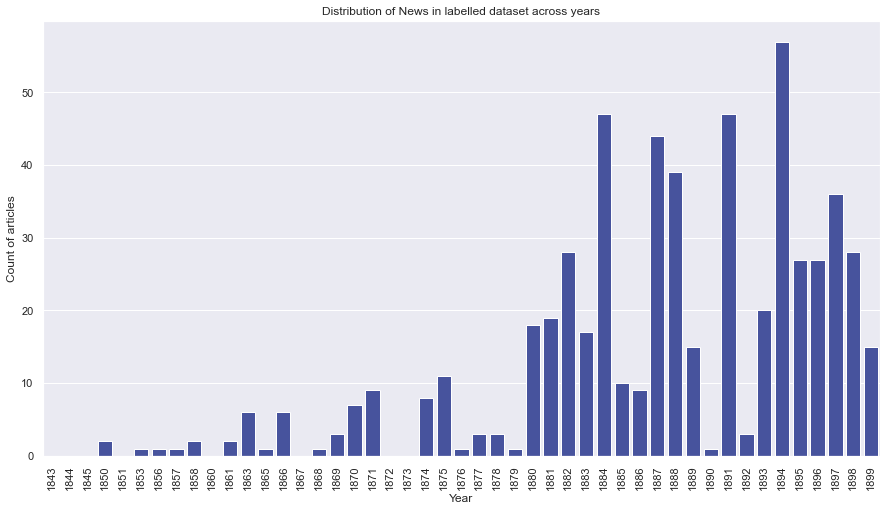

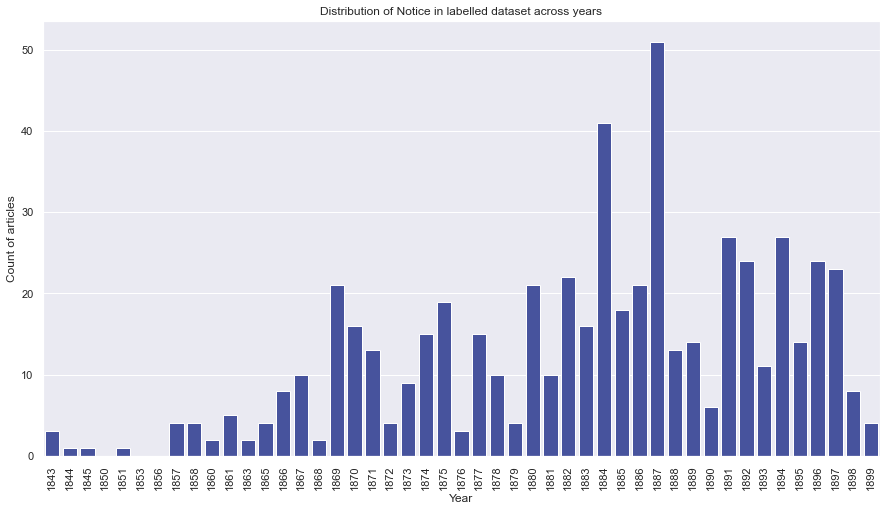

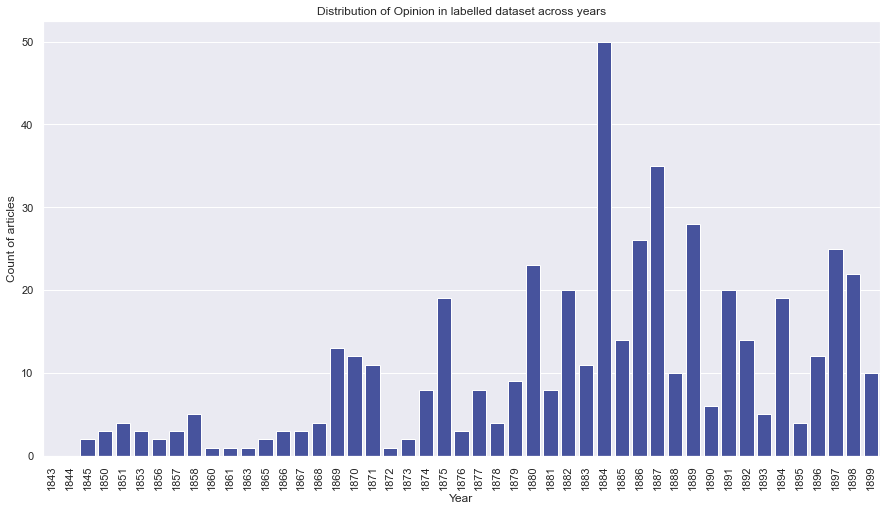

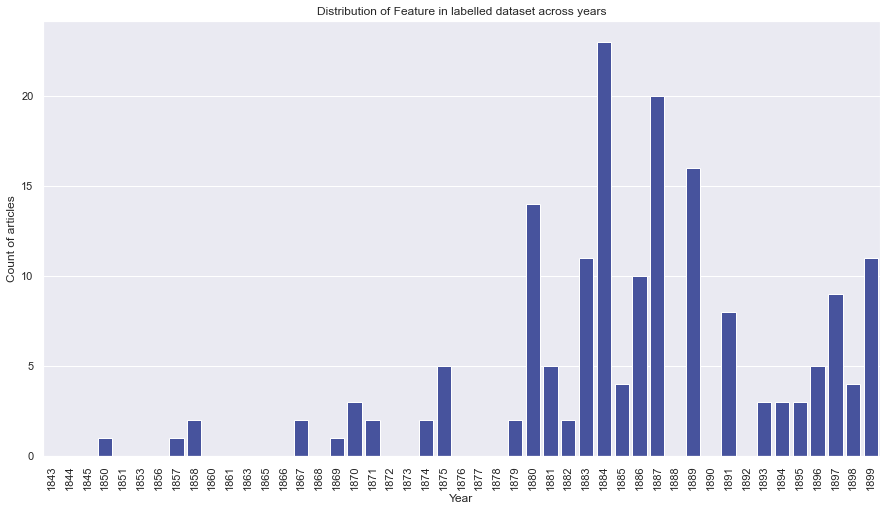

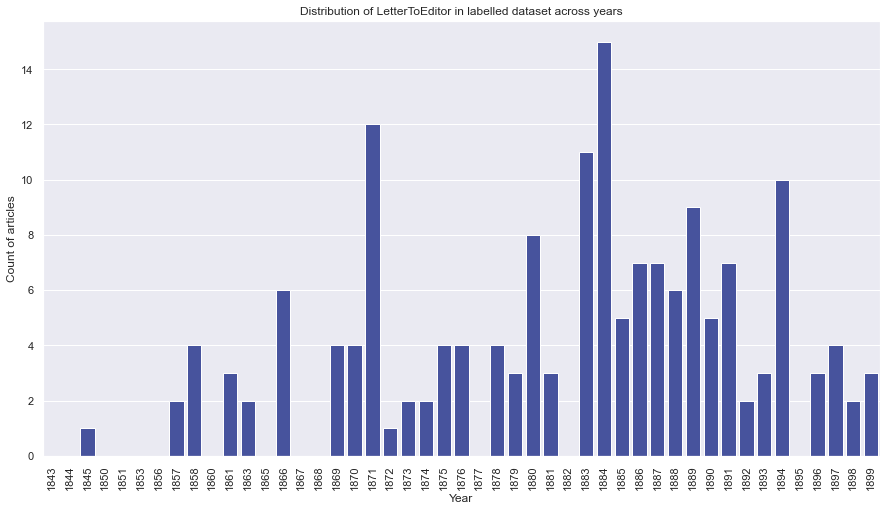

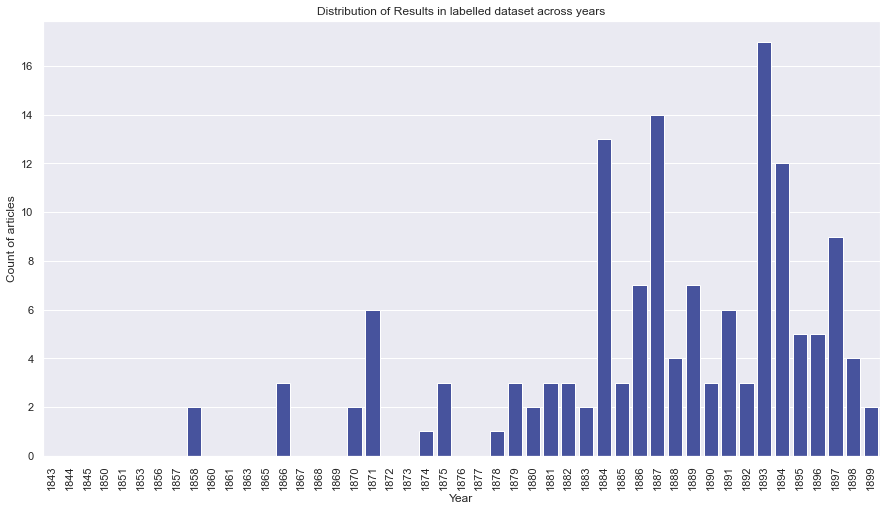

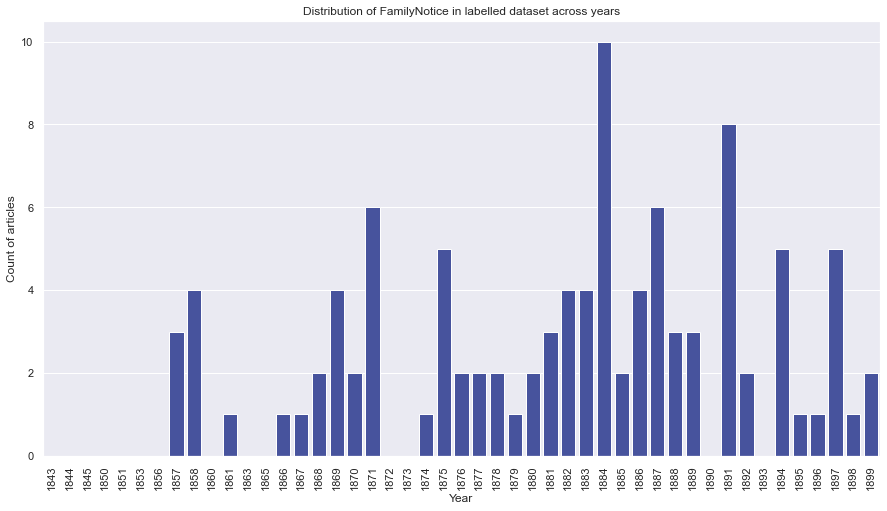

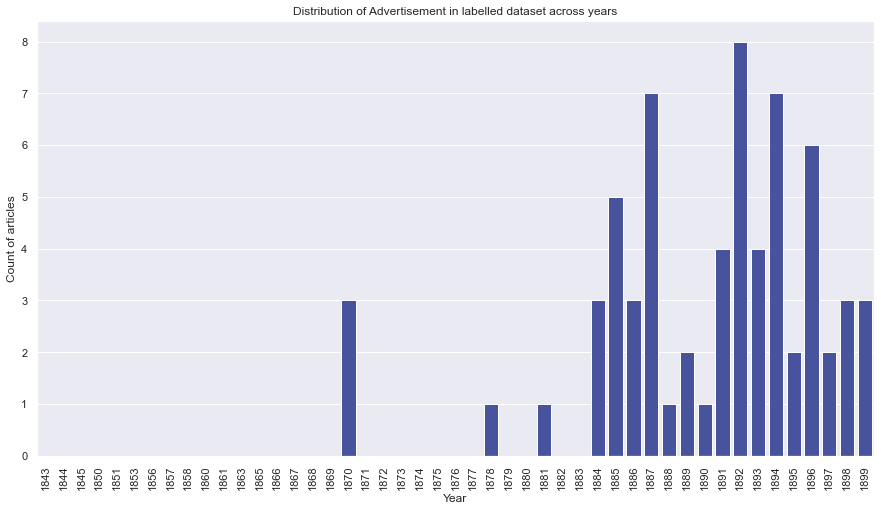

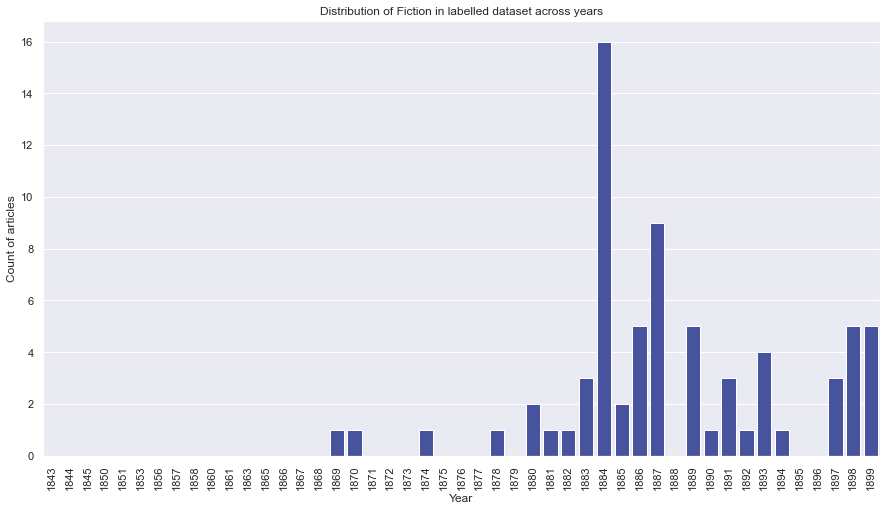

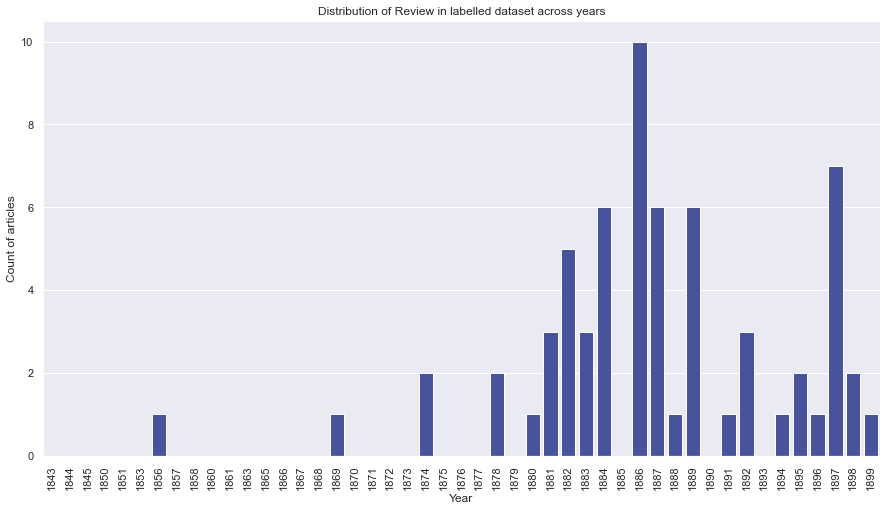

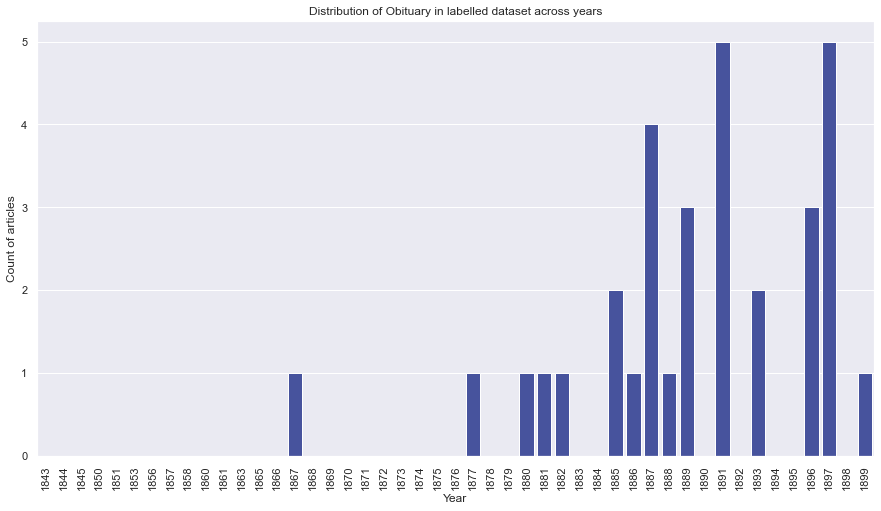

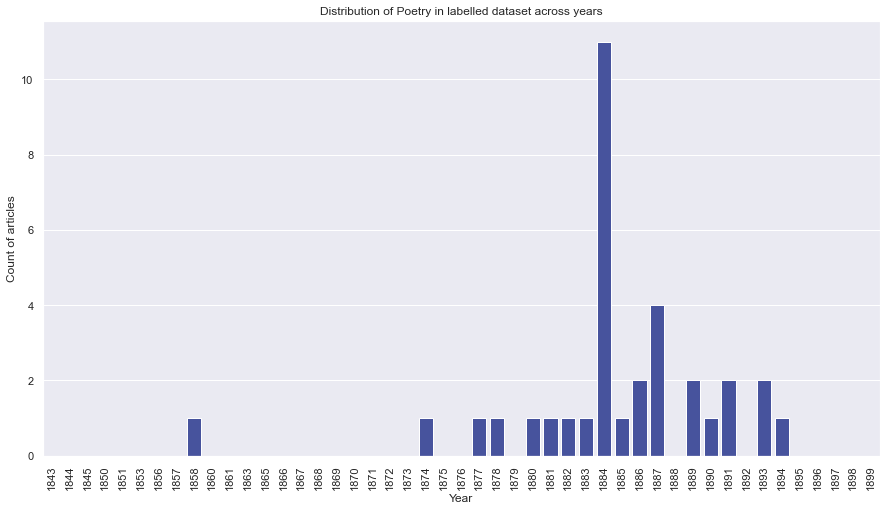

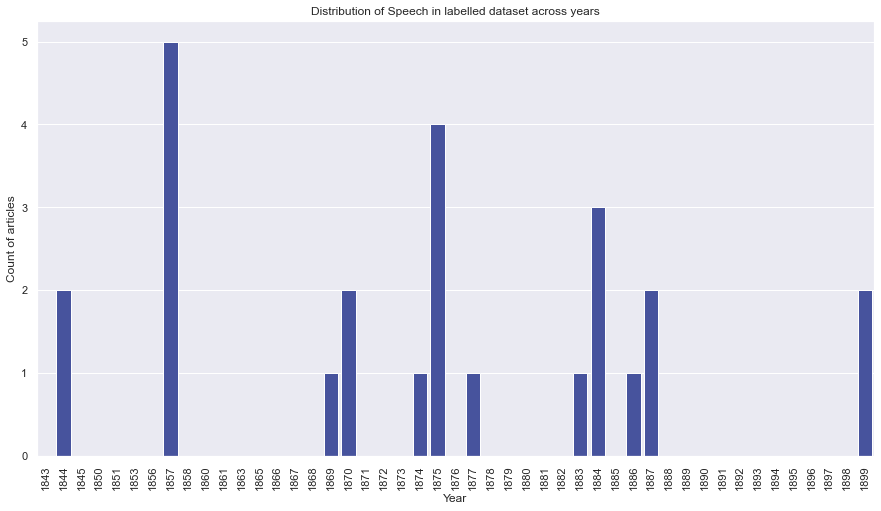

In [41]:
# Barplots of distribution of genre across years
genre_list = ["Report", "News", "Notice", "Opinion", "Feature", \
              "LetterToEditor", "Results", "FamilyNotice", "Advertisement", \
              "Fiction", "Review", "Obituary", "Poetry", "Speech"]

for genre in genre_list:
    ax_4 = sns.barplot(x=annual_genre_df.index, 
                       y=genre, data=annual_genre_df, 
                       color = '#3949ab')
    ax_4.set(xlabel="Year", 
             ylabel = "Count of articles", 
             title = f"Distribution of {genre} in labelled dataset across years")
    plt.xticks(rotation=90)
    plt.show()

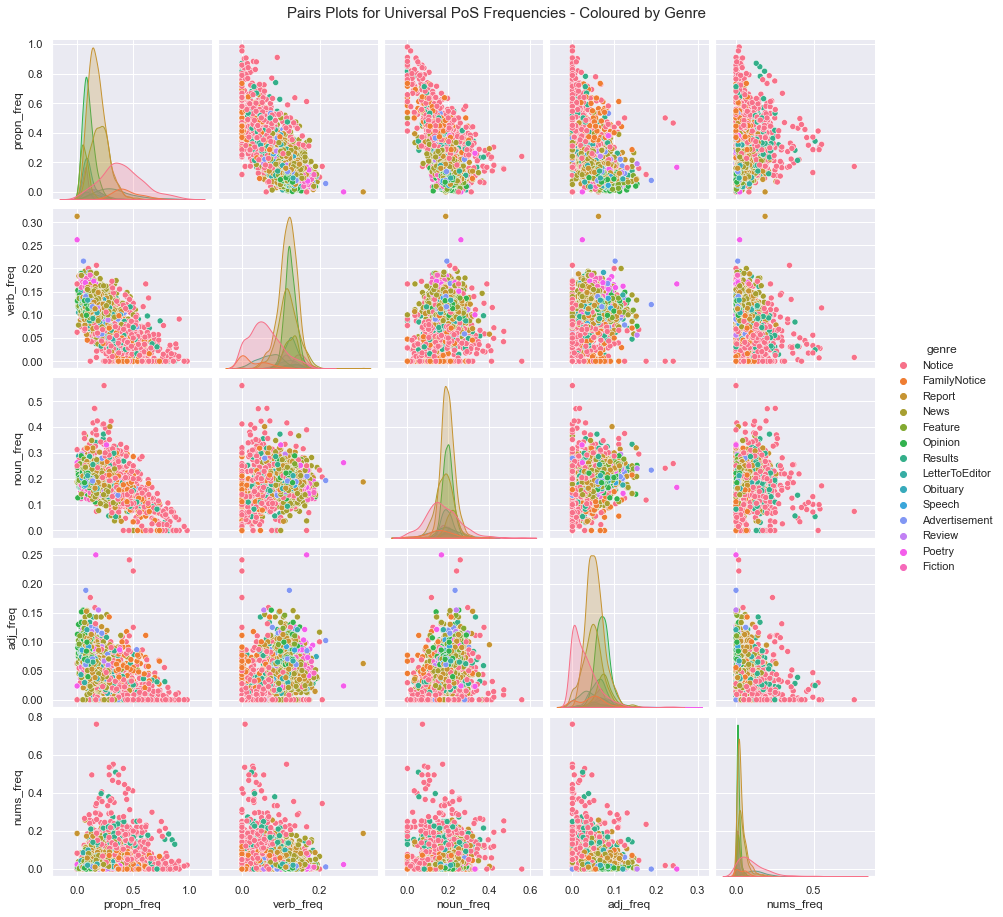

In [35]:
ax_4 = sns.pairplot(features_df, 
                    vars = features_df.columns[40:45],
                    hue ="genre")
ax_4.fig.suptitle("Pairs Plots for Universal PoS Frequencies - Coloured by Genre", 
                  fontsize=15, 
                  y=1.02)
# plt.savefig('pairs_univ_pos.png')
plt.show()

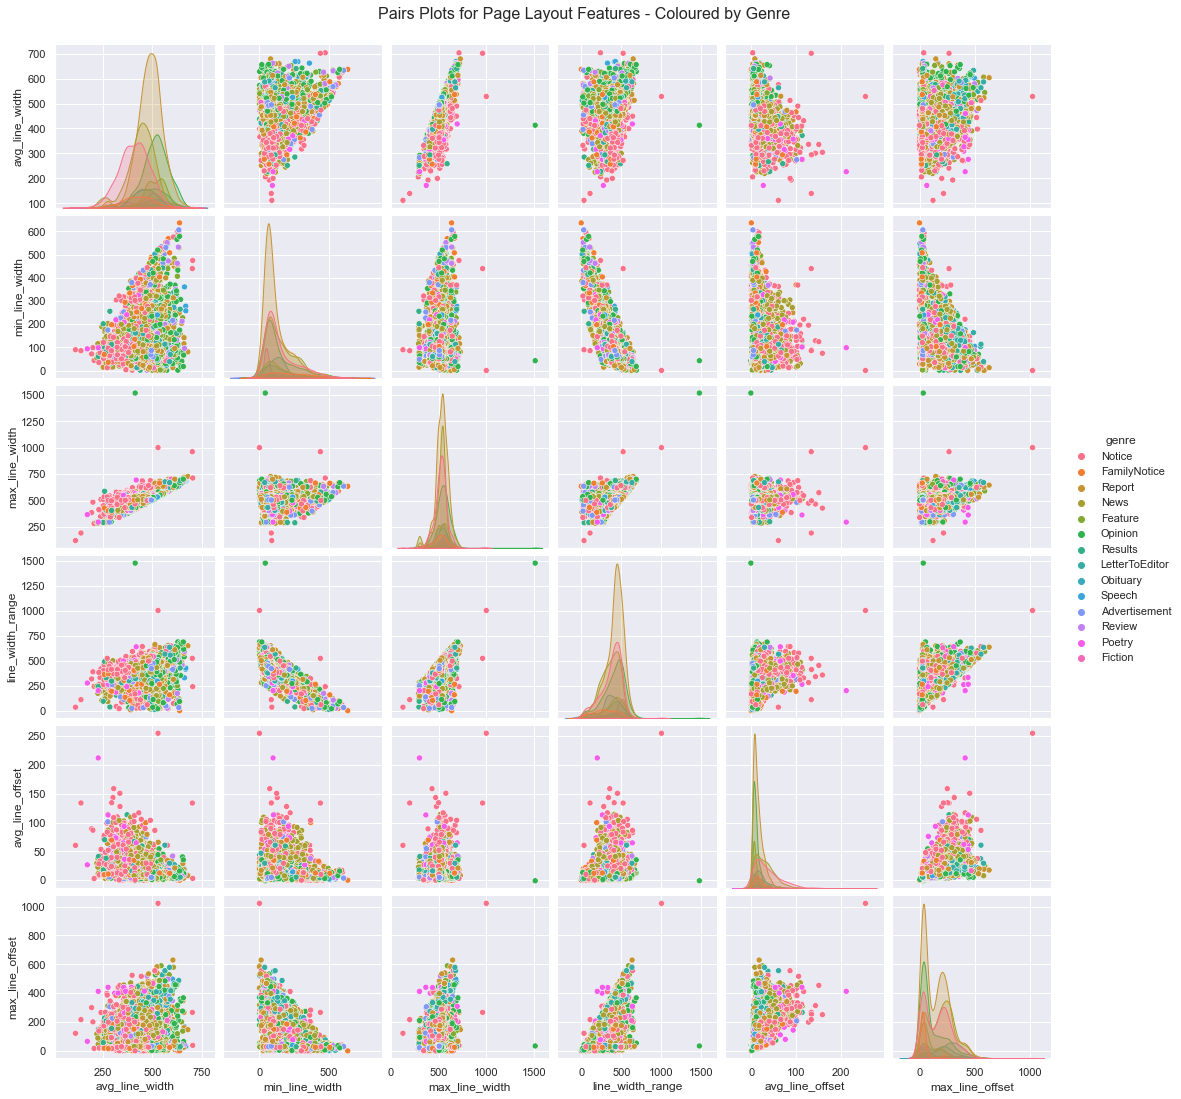

In [36]:
ax_4b = sns.pairplot(features_df, 
                     vars = features_df.columns[4:10], 
                     hue ="genre")
ax_4b.fig.suptitle("Pairs Plots for Page Layout Features - Coloured by Genre", 
                   fontsize=16, 
                   y=1.02)
# plt.savefig('pairs_pagelayout.png')
plt.show()

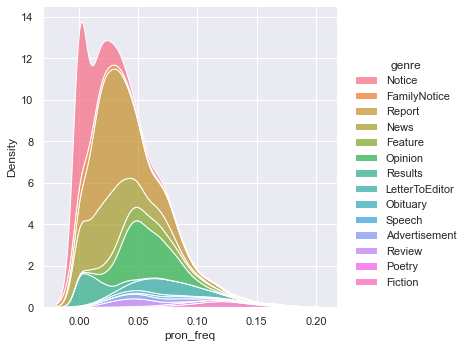

In [23]:
sns.displot(features_df, x="pron_freq", hue="genre", kind="kde", multiple="stack")
plt.show()

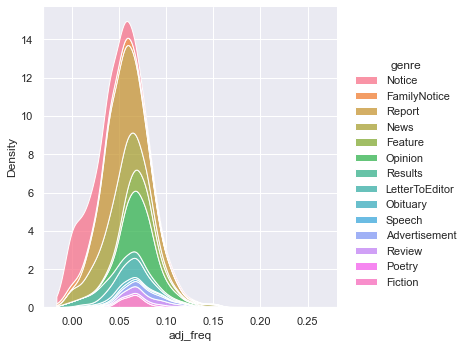

In [24]:
sns.displot(features_df, x="adj_freq", hue="genre", kind="kde", multiple="stack")
plt.show()

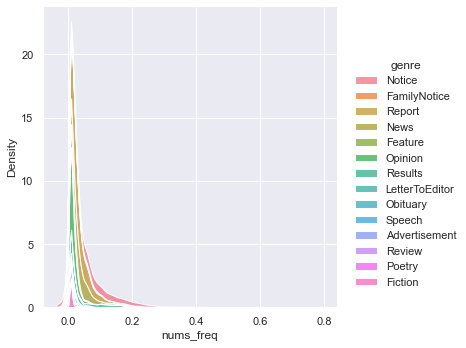

In [25]:
sns.displot(features_df, x="nums_freq", hue="genre", kind="kde", multiple="stack")
plt.show()

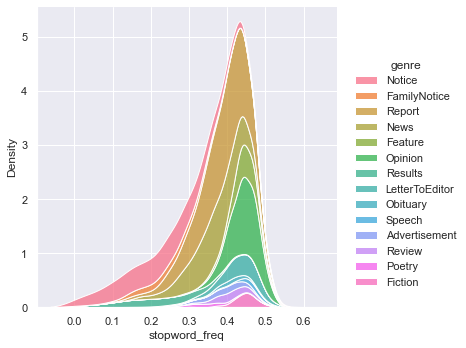

In [26]:
sns.displot(features_df, x="stopword_freq", hue="genre", kind="kde", multiple="stack")
plt.show()

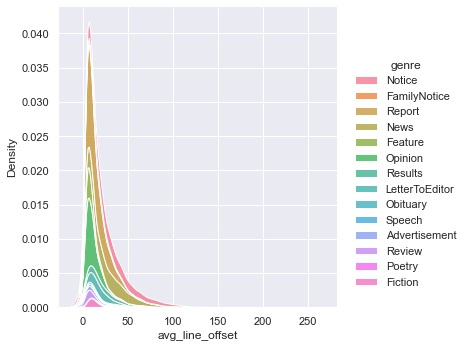

In [27]:
sns.displot(features_df, x="avg_line_offset", hue="genre", kind="kde", multiple="stack")
plt.show()

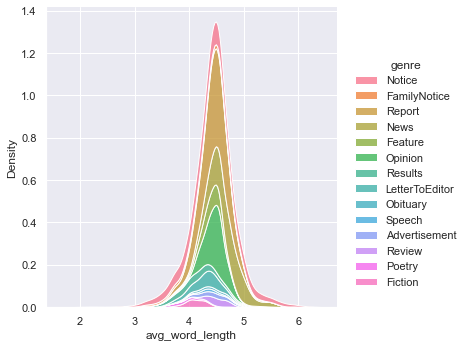

In [28]:
sns.displot(features_df, x="avg_word_length", hue="genre", kind="kde", multiple="stack")
plt.show()

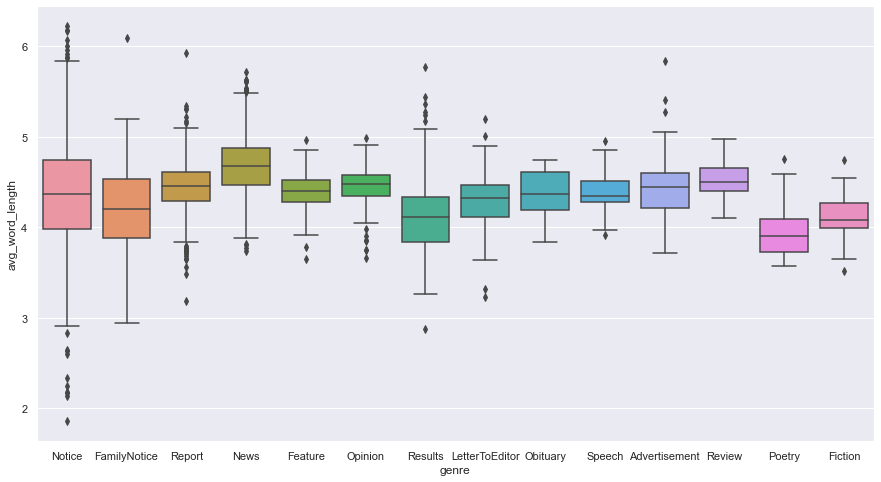

In [29]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.boxplot(x = 'genre', y = 'avg_word_length', data = features_df)
plt.show()

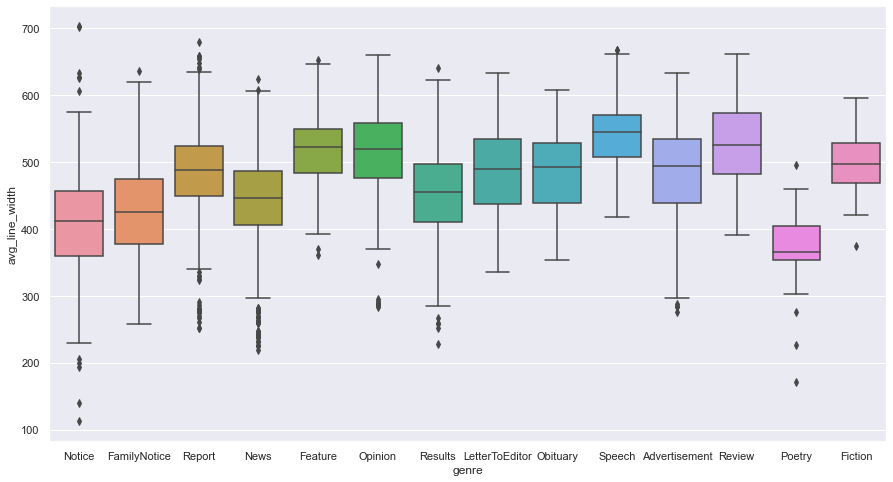

In [30]:
sns.boxplot(x = 'genre', y = 'avg_line_width', data = features_df)
plt.show()

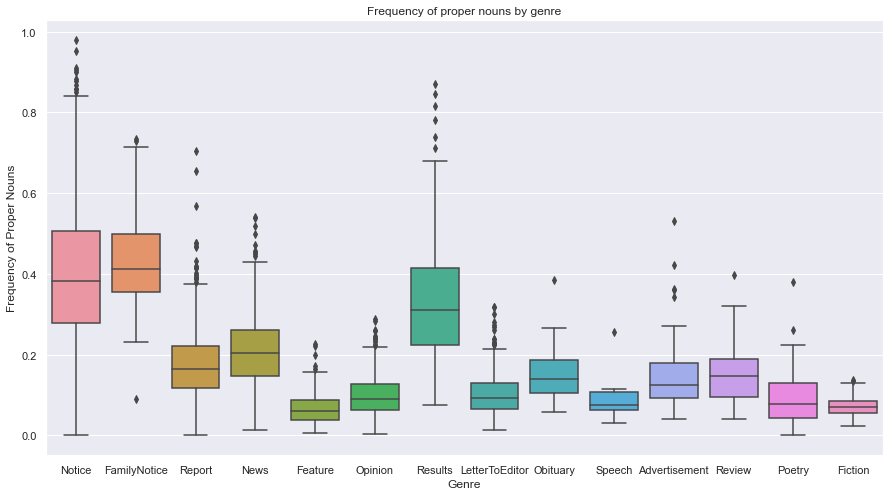

In [42]:
ax_5 = sns.boxplot(x = 'genre', y = 'propn_freq', data = features_df)
ax_5.set(xlabel="Genre", 
         ylabel = "Frequency of Proper Nouns", 
         title = "Frequency of proper nouns by genre")
plt.show()

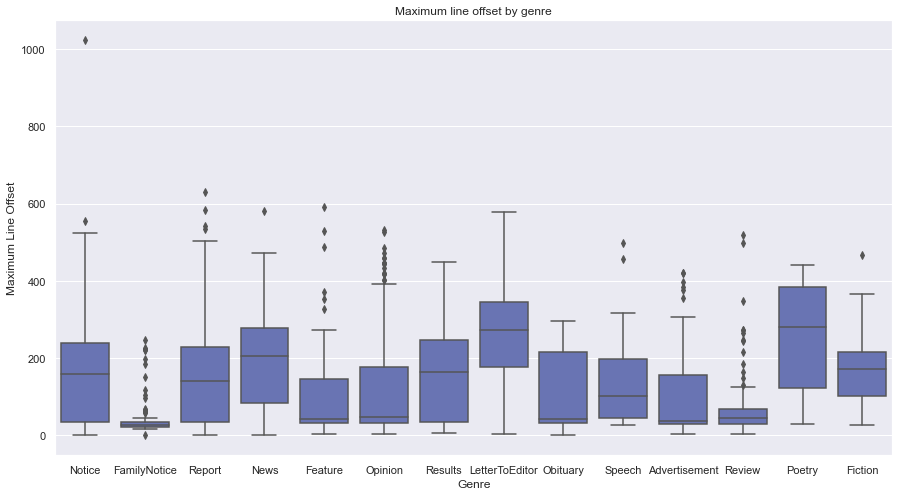

In [43]:
ax_6 = sns.boxplot(x = 'genre', 
                   y = 'max_line_offset', 
                   data = features_df, 
                   color = '#5c6bc0')
ax_6.set(xlabel="Genre", 
         ylabel = "Maximum Line Offset", 
         title = "Maximum line offset by genre")
plt.show()